In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import io
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender']) 


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
#X=df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

#X=df[['Age','Spending Score (1-100)']]

#X=df[['Age','Annual Income (k$)']]

X=df[['Annual Income (k$)','Spending Score (1-100)']]

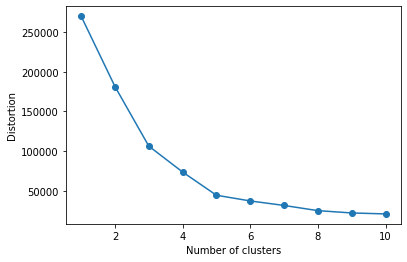

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
    
# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X)

centroids = kmeans.cluster_centers_
centroids

array([[87.        , 18.63157895],
       [44.15447154, 49.82926829],
       [86.53846154, 82.12820513]])

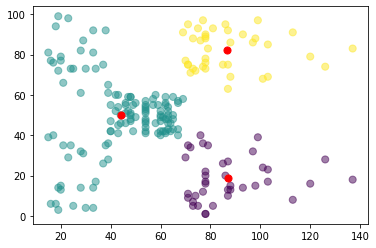

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()